# **MODERN COMPUTER VISION** #
##### BY RAJEEV RATAN

<h2 style="margin-bottom:0;">🚀 Finding Corners</h2>

<h5 style="margin-top:5px;">In this lesson we'll learn:</h5>

<p style="margin-top:0;">
1️⃣ To use Harris Corners to find corners <br>
2️⃣ Use Good Features to Track <br>
</p>

In [3]:
# Our Setup, Import Libraries and Create our Imshow Function
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

### **What is a Corner** ###
#### **cv2.cornerHarris**(input image, block size, ksize, k) ####

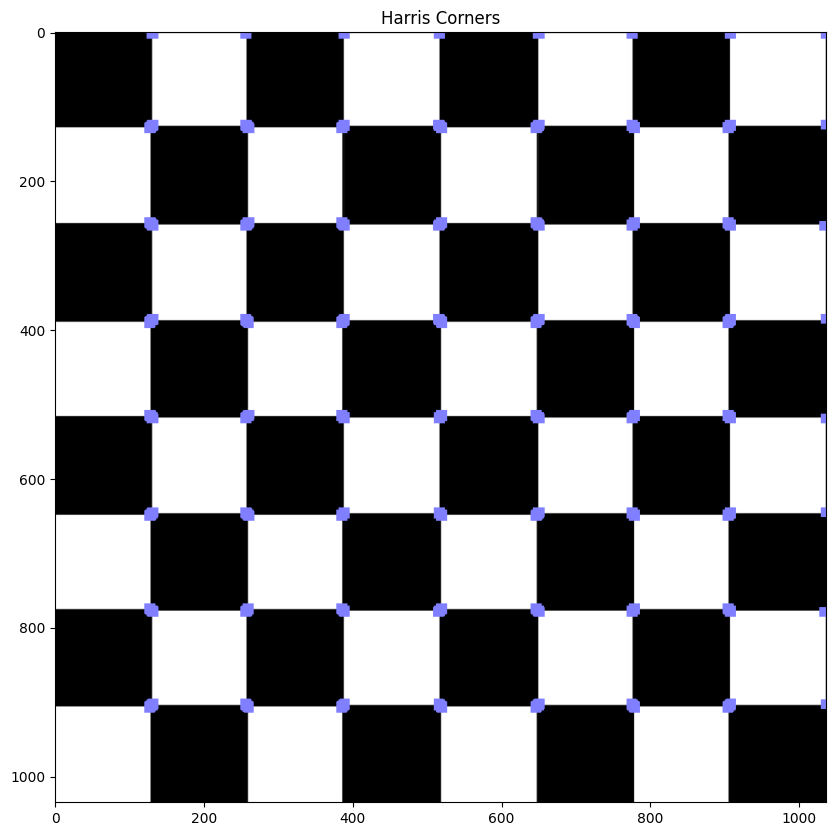

In [6]:
# Load image then grayscale
image = cv2.imread("../images/chess.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# The cornerHarris function requires the array datatype to be float32
gray = np.float32(gray)

harris_corners = cv2.cornerHarris(gray, 3, 3, 0.05)

# We use dilation of the corner points to enlarge them
kernel = np.ones((7,7), np.uint8)
harris_corners = cv2.dilate(harris_corners, kernel, iterations = 2)

# Threshold for an optimal value, it may vary depending on the image
image[harris_corners > 0.025 * harris_corners.max()] = [255, 127, 127]

imshow("Harris Corners", image)

### **cv2.goodFeaturesToTrack**(input image, maxCorners, qualityLevel, minDistance) ###

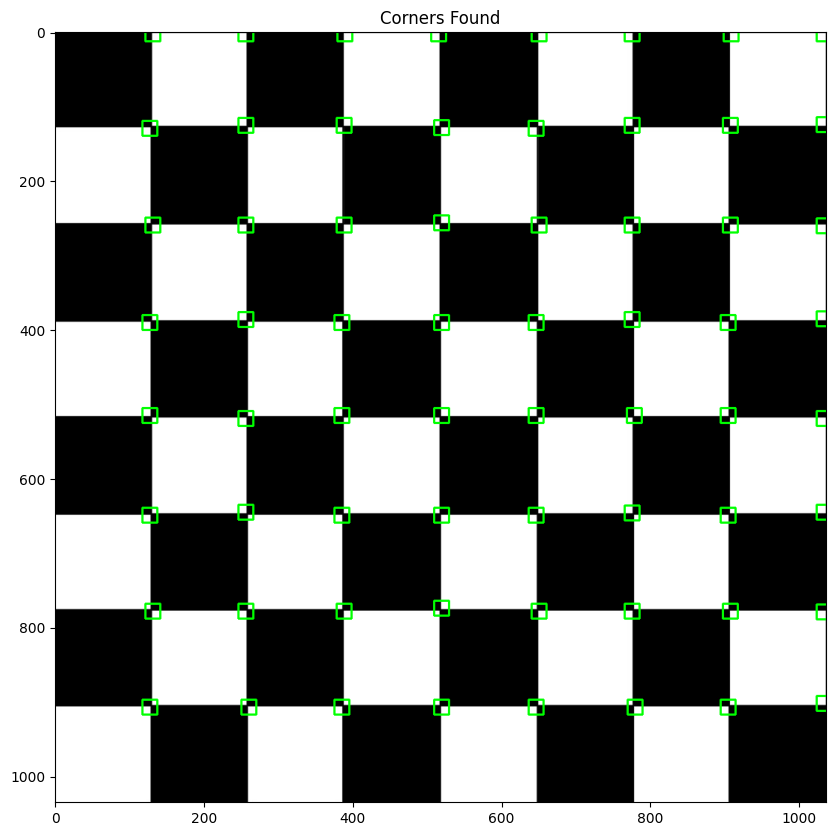

In [8]:
img = cv2.imread("../images/chess.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# We specify the top 50 corners
corners = cv2.goodFeaturesToTrack(gray, 150, 0.0005, 10)

for corner in corners:
    x, y = corner[0]
    x = int(x)
    y = int(y)
    cv2.rectangle(img, (x-10, y-10), (x+10, y+10), (0, 255, 0), 2)

imshow("Corners Found", img)